# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



In [1]:
# TODO: RA \& Name 
print('139373: ' + 'Cinthia Cristina Calchi Kleiner')
print('103897: ' + 'Randerson A. Lemos')

139373: Cinthia Cristina Calchi Kleiner
103897: Randerson A. Lemos


 ## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?




In [2]:
# TODO: Load and preprocess your dataset.

import time
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import SGDRegressor, LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, balanced_accuracy_score,roc_auc_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = None

Setting a seed to ensure reproducibility

In [4]:
SEED = 42

### Exploratory Data Analysis:

In [5]:
data_path = "assets/SARESP_train.csv"
df=pd.read_csv(data_path)

In [6]:
print(df.shape)

(120596, 88)


With a pandas dataframe, it is possible to check how many records we have in thetrainning data. Let's use the method DataFrame.info to get an overview of the loaded dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120596 entries, 0 to 120595
Data columns (total 88 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CD_ALUNO             120596 non-null  int64  
 1   NOMESC               120596 non-null  object 
 2   Q1                   120596 non-null  object 
 3   Q2                   120596 non-null  object 
 4   Q3                   120596 non-null  object 
 5   Q4                   120596 non-null  object 
 6   Q5                   120596 non-null  object 
 7   Q6                   120596 non-null  object 
 8   Q7                   120596 non-null  object 
 9   Q8                   120596 non-null  object 
 10  Q9                   120596 non-null  object 
 11  Q10                  120596 non-null  object 
 12  Q11                  120596 non-null  object 
 13  Q12                  120596 non-null  object 
 14  Q13                  120596 non-null  object 
 15  Q14              

Let's now visualize the percentage of the number of missing data in each dataframe column. The following code show us the columns that have a null values percentage greater than zero. The variables NEC_ESP_1, NEC_ESP_2 , NEC_ESP_2, NEC_ESP_4 and NEC_ESP_5 do not own 98% of their data. 
At a first glancy, it seens that the columns NEC_ESP_* are degenerated with the marjority of the samples missing. But, since this columns are associated to students with some sort of special deasibility it is plausible to assume that the samples with no information are from students that do not carry those  conditions. Even thoungh this is the case, we decided to still drop those columns since the column Tem_Nec sintetizes the information of students with with and without those special conditions.

In [8]:
for col in df.columns:
    na_percentage = df[col].isna().sum() / df.shape[0] * 100
    if na_percentage > 0:
        print(f'Column Name: {col}, Null Values Percentage: {na_percentage}')

Column Name: NEC_ESP_1, Null Values Percentage: 98.01817639059338
Column Name: NEC_ESP_2, Null Values Percentage: 99.91127400577133
Column Name: NEC_ESP_3, Null Values Percentage: 99.93697966765068
Column Name: NEC_ESP_4, Null Values Percentage: 99.99917078510066
Column Name: NEC_ESP_5, Null Values Percentage: 100.0


In [9]:
###
# Dataset actual state
###

df.head(10)

,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,MUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,NEC_ESP_1,NEC_ESP_2,NEC_ESP_3,NEC_ESP_4,NEC_ESP_5,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,26270013,JULIO FORTES,B,E,E,E,E,E,E,E,B,A,A,A,A,A,A,B,A,B,B,B,B,A,A,A,A,A,C,C,B,B,B,C,A,B,C,C,C,C,C,C,C,A,C,C,C,C,C,C,C,B,C,B,B,B,B,A,D,C,C,D,C,A,D,Região Metropolitana do Vale do Paraíba e Lito...,GUARATINGUETA,414,LAVRINHAS,901489,EM-3ª série,A,F,11/15/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,41.7,20.8,20.8,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
1,30756614,MESSIAS FREIRE PROFESSOR,B,D,E,C,E,E,E,E,A,A,A,A,A,A,A,B,B,C,C,B,B,A,D,A,D,C,C,C,C,B,B,D,A,A,B,C,C,B,C,B,C,A,C,C,C,B,B,B,C,B,B,B,B,A,A,A,C,C,C,C,C,C,B,Região Metropolitana de São Paulo,SUL 1,100,SAO PAULO,37461,5º Ano EF,A,M,6/7/2010,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,83.3,100.0,66.7,Adequado,Avançado,Adequado
2,26014872,JOSE CONTI,B,E,B,D,E,B,D,C,A,A,A,A,B,A,B,C,B,B,A,A,A,A,A,A,A,D,C,B,A,A,B,B,A,B,B,C,B,C,C,C,B,A,B,B,C,C,B,B,C,D,C,C,B,C,B,A,E,B,C,B,D,C,C,Interior,JAU,348,IGARACU DO TIETE,25963,9º Ano EF,A,F,12/10/2006,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,58.3,37.5,54.2,Básico,Básico,Básico
3,25739025,NAPOLEAO DE CARVALHO FREIRE PROFESSOR,B,D,E,D,C,E,D,D,A,A,B,B,C,B,B,C,B,B,A,B,A,B,B,A,B,D,B,A,B,A,B,B,B,B,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,B,B,D,C,A,A,A,E,C,C,B,C,B,C,Região Metropolitana de São Paulo,CENTRO OESTE,100,SAO PAULO,3924,EM-3ª série,B,M,10/3/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,29.2,29.2,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
4,27363009,RESIDENCIAL BORDON,B,D,E,E,E,E,E,C,A,A,A,A,C,A,B,C,B,B,A,B,A,A,B,A,B,C,C,A,C,B,B,B,B,A,C,C,B,C,C,C,C,A,C,B,C,C,B,B,B,B,B,B,B,B,B,A,E,B,C,A,D,A,D,Região Metropolitana de Campinas,SUMARE,671,SUMARE,576670,9º Ano EF,D,F,4/6/2007,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,79.2,41.7,50.0,Adequado,Abaixo do Básico,Básico
5,29106659,ANA MESQUITA LAURINI,B,C,D,C,C,D,C,C,A,A,B,B,C,B,C,B,B,B,A,B,B,A,B,A,B,A,B,B,A,A,B,A,C,A,B,B,B,B,C,C,B,B,C,C,C,C,C,C,C,C,C,B,B,B,C,A,C,B,B,A,D,D,D,Interior,ITU,233,CABREUVA,36171,9º Ano EF,B,M,12/10/2006,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,66.7,66.7,70.8,Básico,Básico,Básico
6,26920670,HERBERT BALDUS,B,E,D,E,E,C,E,E,A,A,B,A,B,B,A,A,B,C,A,A,B,B,B,A,B,D,B,A,B,A,C,B,C,B,C,C,C,C,C,C,C,B,C,B,C,C,C,C,C,C,D,E,C,B,B,A,D,C,A,A,A,B,C,Região Metropolitana de São Paulo,SUL 3,100,SAO PAULO,5459,EM-3ª série,D,F,9/21/2003,NOITE,NaN,NaN,NaN,NaN,NaN,C,0,50.0,16.7,62.5,Básico,Abaixo do Básico,Básico
7,23566650,TEOFILO DE ANDRADE DOUTOR,A,E,D,D,D,D,D,C,B,A,A,A,A,A,A,A,A,A,B,B,B,A,A,A,A,A,C,C,B,C,C,B,A,B,C,C,C,C,C,C,C,A,B,C,B,B,C,C,B,D,D,E,B,D,B,A,D,C,A,D,C,C,C,Interior,SAO JOAO DA BOA VISTA,639,SAO JOAO DA BOA VISTA,20710,EM-3ª série,A,M,5/20/2004,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,87.5,83.3,79.2,Adequado,Adequado,Adequado
8,29849774,FERNANDO BRASIL PROF,A,E,E,E,E,E,E,E,A,A,A,A,A,A,A,B,B,A,B,A,B,A,B,A,B,B,C,C,C,C,B,A,A,B,C,C,C,C,C,C,C,A,D,B,D,D,D,D,D,B,B,B,B,A,B,A,C,B,C,B,C,A,C,Interior,TAQUARITINGA,674,TABATINGA,22056,5º Ano EF,A,M,3/31/2011,TARDE,NaN,NaN,NaN,NaN,NaN,C,0,29.2,41.7,20.8,Abaixo do Básico,Básico,Abaixo do Básico
9,32568405,ASTROGILDO SILVA PROFESSOR,B,E,D,D,E,E,E,D,A,A,A,A,C,A,B,C,A,B,A,A,A,A,A,A,A,A,C,B,C,B,B,B,A,A,C,B,C,B,C,C,B,B,C,C,C,C,C,C,C,B,C,A,B,A,C,A,D,B,C,B,C,C,C,Região Metropolitana de São Paulo,CENTRO SUL,100,SAO PAULO,4364,5º Ano EF,B,F,5/14/2010,TARDE,NaN,NaN,NaN,NaN,NaN,C,0,75.0,75.0,66.7,Adequado,Adequado,Adequado


Now, let's check some statistics from the dataset:

In [10]:
df.describe()

,CD_ALUNO,CODMUN,CODESC,NEC_ESP_5,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE
count,1.205960e+05,120596.000000,120596.000000,0.0,120596.000000,120596.000000,120596.000000,120596.000000
mean,2.734087e+07,364.349075,279415.870510,NaN,0.019818,60.151213,52.225829,56.928877
std,2.946464e+06,220.098318,394245.824543,NaN,0.139376,21.730825,21.262466,18.441383
min,1.739548e+07,100.000000,24.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.529711e+07,100.000000,15568.000000,NaN,0.000000,41.700000,37.500000,45.800000
50%,2.712102e+07,336.000000,35178.000000,NaN,0.000000,62.500000,50.000000,58.300000
75%,2.910558e+07,582.000000,901573.000000,NaN,0.000000,79.200000,66.700000,70.800000
max,3.796186e+07,793.000000,926103.000000,NaN,1.000000,100.000000,100.000000,100.000000


In order to analyze the representativeness of the data, some evaluations were made.First, we analyzed how the porcentage of records comming from student that has any special needs. 98% of the data records are from students that dont have any special needs.

In [11]:
df['Tem_Nec'].value_counts(normalize=True)

0    0.980182
1    0.019818
Name: Tem_Nec, dtype: float64

Then, we analyzed the porcentage of records comming from girls and boys tests wase evaluated. It is possible to note that 52.23 % of the records are from girls and 47.68 % are from boys

In [12]:
df['TP_SEXO'].value_counts(normalize=True)

F    0.523135
M    0.476865
Name: TP_SEXO, dtype: float64

The next step was the evalaution of  the contribution of the different regions evaluated in the chool Performance Assessment System of the State of São Paulo (SARESP). The Mertropolitan region of São Paulo is the region with the highest participation (39.33 %), followed by the interior (32.51 %). The region with the lowest participation was the Metropolitan region of Campinas with (2.87 %) of participation in the records:

In [13]:
df['RegiaoMetropolitana'].value_counts(normalize=True)

Região Metropolitana de São Paulo                          0.393355
Interior                                                   0.325143
Região Metropolitana do Vale do Paraíba e Litoral Norte    0.077507
Região Metropolitana da Baixada Santista                   0.063750
Região Metropolitana de Sorocaba                           0.055856
Região Metropolitana de Ribeirão Preto                     0.055657
Região Metropolitana de Campinas                           0.028732
Name: RegiaoMetropolitana, dtype: float64

By the column MUN analyzes it is possible to verify that 351 cities participate in the sense. The city of São Paulo was the municipality that had the highest participation in the evaluation (28% of the records). As the data from the MUN column and the CODMUN provide the same information, the CODMUN will be removed from the analysis. 

In [14]:
df['MUN'].value_counts(normalize=True)

SAO PAULO              0.282771
SOROCABA               0.027629
SAO JOSE DOS CAMPOS    0.024337
CARAPICUIBA            0.019039
DIADEMA                0.018550
                         ...   
REDENCAO DA SERRA      0.000017
ESTIVA GERBI           0.000017
ESTRELA DO NORTE       0.000008
ANALANDIA              0.000008
AGUAS DE SAO PEDRO     0.000008
Name: MUN, Length: 351, dtype: float64

Evaluating the School Name and the School Id, it is possible to see that the information of both variables are similar. So we decided to drop the School Name of the data analysis.

In [15]:
df['NOMESC'].value_counts(normalize=True)

ALBERTO SALOTTI PROF EE                  0.003698
CARMELINDA MARQUES PEREIRA PROFESSORA    0.002712
MIGUEL DE CERVANTES Y SAAVEDRA DOM       0.002645
ANA CECILIA MARTINS PROFESSORA           0.002529
JOSE MARIA PEREZ FERREIRA PROFESSOR      0.002521
                                           ...   
PEDRO CASEMIRO LEITE PROFESSOR           0.000008
EDMUNDO DE CARVALHO DOUTOR               0.000008
ROQUE THEOPHILO                          0.000008
RENATO BRAGA PROFESSOR                   0.000008
BAIRRO DO TURVO                          0.000008
Name: NOMESC, Length: 2746, dtype: float64

 Then, we evaluated the data from the targets in the classification and regression taks:

In [16]:
def multiple_hist_plots(n_lines, n_coluns, columns_names, binwidth, dx, dy):
    '''
    Multiple plots histograms based on columns names
    Args:
        n_lines: number of lines in subplots
        n_columns: number of columns in subplots
        columns_names: list of columns names
    Returns:
        Seaborn histogram subplots
    '''
    
    fig, axes = plt.subplots(n_lines,n_coluns, figsize=(9,4))
    for i,column_name in enumerate(columns_names):
        sns.histplot(data=df[column_name], binwidth=binwidth, kde=True, ax=axes[i]).set(title=column_name)
        fig.axes[i].axvline(x=df[column_name].median(), color='red', ls='--', lw=2.5)
        fig.axes[i].text(df[column_name].median()+dx,dy,f'{df[column_name].median()}',fontsize=12, rotation=90)
        
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    
def multiple_cat_plot(df, n_lines, n_coluns, columns_names, binwidth):
    '''Multiple plots histograms based on columns names
    Args:
        n_lines: number of lines in subplots
        n_columns: number of columns in subplots
        columns_names: list of columns names
    Returns:
        Seaborn histogram subplots
    '''
    df_cat = df.copy()
    fig, axes = plt.subplots(n_lines,n_coluns, figsize=(16,6))
    for i,column_name in enumerate(columns_names):
        df_cat[column_name] = pd.Categorical(df_cat[column_name], ['Abaixo do Básico', 'Básico', 'Adequado', 'Avançado'])
        sns.histplot(data=df_cat[column_name], binwidth=binwidth, kde=False, ax=axes[i]).set(title=column_name)
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()

Evaluating the data about the the proficiency level in Portuguese, Math and Natural Sciences Test it is possible to note that Portuguese and Maths were the subejcts that the students performed better and worse respectively.

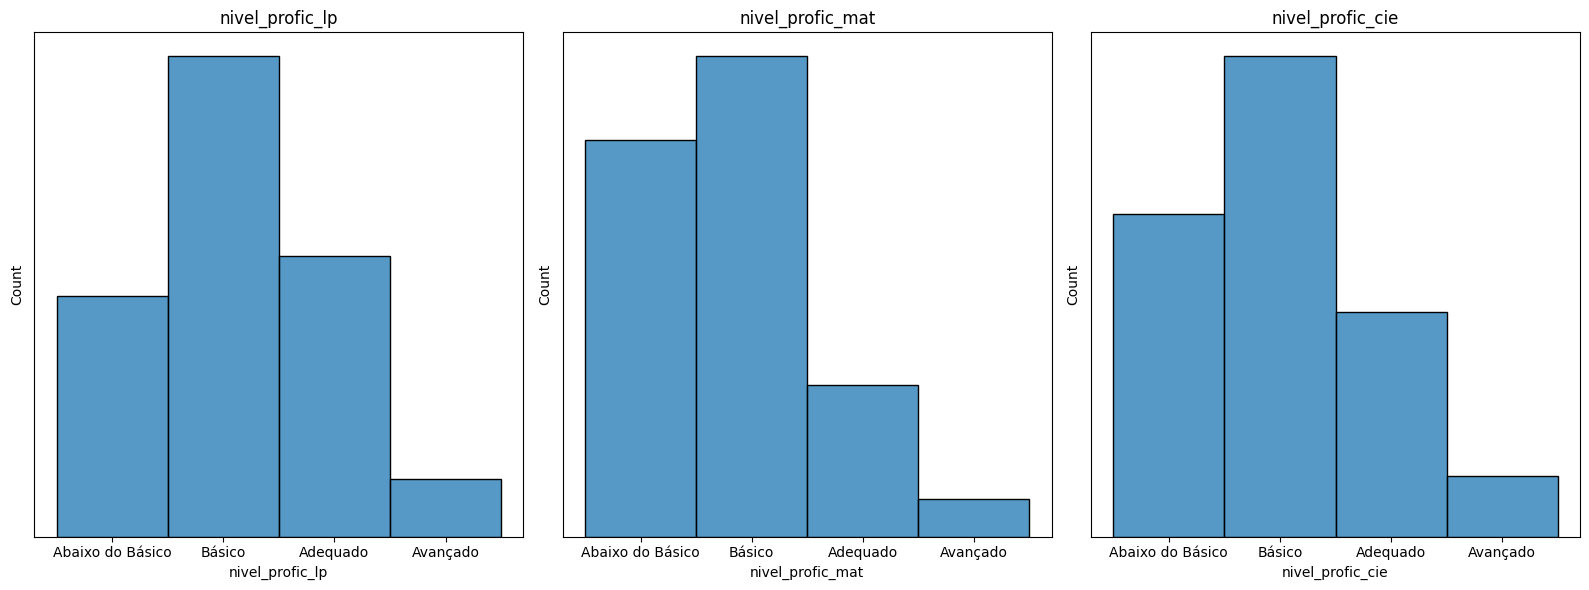

In [17]:
nivel_profic_hist_plots = multiple_cat_plot(df,1,3,['nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie'],0.8)

Analyzing the distribution of the data in the target variables related to the level of proficiency, we noticed that we are working with unbalanced classes in the classification task(Logistic Regression). As it is possible to check in the next cell, in subejcts, wehave more examples os class 'Basico' and less examples of class 'Avançado'. We can see that this analysis  corroborates with the distribution present in the graph

In [18]:
columns_name = ['nivel_profic_lp','nivel_profic_mat','nivel_profic_cie']

for column_name in columns_name:
    print(df[column_name].value_counts(normalize=True))

Básico              0.453456
Adequado            0.264876
Abaixo do Básico    0.227255
Avançado            0.054413
Name: nivel_profic_lp, dtype: float64
Básico              0.450214
Abaixo do Básico    0.372243
Adequado            0.142061
Avançado            0.035482
Name: nivel_profic_mat, dtype: float64
Básico              0.441399
Abaixo do Básico    0.296511
Adequado            0.206657
Avançado            0.055433
Name: nivel_profic_cie, dtype: float64


 Then, we evaluated the histogram distribuction of the Percentage of correct answers in Portuguese, Mathematics and Natural Sciences Test.With the plots it is possible to conclude that the students perfomed better on Portuguese test, with the percentage in almost 62.5 %. The math test was the test where the students performed worse, with a hit percentage around 50.0 %. In Natural Sciences tests the students had hit percentage around 58.3 %. Comparing the distribution of histograms, it is possible to verify that in the math test that is a greater occurence of lower scores than the other tests. So, the data of percentage of correct answers corroborate with the level of proficiency data.

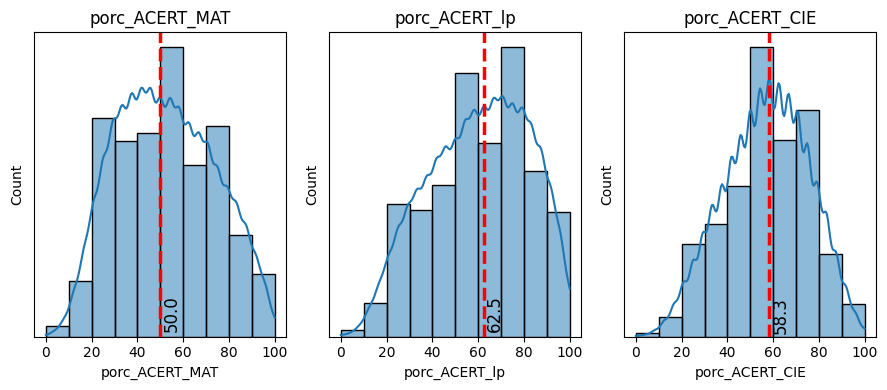

In [19]:
por_acert_hist_plots = multiple_hist_plots(1,3,['porc_ACERT_MAT','porc_ACERT_lp','porc_ACERT_CIE'],10,1,700)

With the .describe method of the columns related to the percentage of hits in Math, Portuguese and Sciences, it is possible to note that there is no outliers in the notes. Math Subject was the subject where more students have lower grades, 50% of the students have grades with values up to 50.00 , in contrast, in Portuguese Subject, 50% of the students reached grades until 62.50. 

In [20]:
df[['porc_ACERT_MAT','porc_ACERT_lp','porc_ACERT_CIE']].describe()

,porc_ACERT_MAT,porc_ACERT_lp,porc_ACERT_CIE
count,120596.000000,120596.000000,120596.000000
mean,52.225829,60.151213,56.928877
std,21.262466,21.730825,18.441383
min,0.000000,0.000000,0.000000
25%,37.500000,41.700000,45.800000
50%,50.000000,62.500000,58.300000
75%,66.700000,79.200000,70.800000
max,100.000000,100.000000,100.000000


With a correlation matrix it is possible to note how the features related with the hit percentage of one subject have strong correlation with the hit percentage of another subject. In this first moment, the correlation matrix is making correlations only with variables with the same structure, in this case only numerical variables are being compared. The matrix also demonstrates that the student code also correlates with the grades, demonstrating how the individualities of each student can contribute to their performance.

<AxesSubplot:>

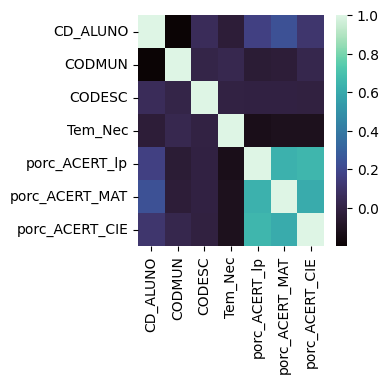

In [21]:
df_corr = df.drop(['NEC_ESP_5'],axis=1)
df_corr = df_corr.corr()
fig, axes = plt.subplots(figsize=(3,3))
sns.heatmap(df_corr, cmap='mako')

## Data Preparation:

In order to create a preprocess pipeline valid for both problems (classification and regression), some function were created. In this pipeline, categorical variables are trasnformed into numerical variables by one hot encoding process. The functions are described in the cells below. 


In [22]:
def categorical_into_numeric(X, le=None):
    '''
    Transform categorial into numeric data based on one hot encoding
    Args:
        X: data
        le: label encoder with fit transform
    Returns:
        X: data with numeric features
        le: label encoder with fit transform
    '''
    if not le:
        le = {}
        
    columns_names = X.columns.to_list()
    column_object_names = []
    for column_name in columns_names:
        if X[str(column_name)].dtype == object or column_name == "CODESC":
            if column_name not in le.keys():
                le[column_name] =  OneHotEncoder()
                transformed = le[column_name].fit_transform(X[column_name].values[:, None]).toarray()
            else:
                transformed = le[column_name].transform(X[column_name].values[:, None]).toarray()
            for cat in range(transformed.shape[1]):
                X[f"{str(column_name)}_{cat}"] = transformed[:, cat]
            X = X.drop(columns=column_name)
            
    return X, le

def feature_target_split(X,df,column_name):
    '''
    Divide data into X and y sets
    Args:
        X: data
        df: dataframe
        column_name: column name of the target
    Returns:
        X_column: all data except targets
        y_colum: target data
    '''
    
    X_column = X.copy()
    y_column = df[[column_name]].values
    
    
    return X_column, y_column

def data_transform(df, columns_names, le=None):
    '''
    Applies data transformation in the input data and divide the data in x, y by subject
    Args:
        df: dataframe
        column_name: column name of the target
        le = label encoder with fit transform
    Returns:
       X_lp, y_lp: x and y lp subject trainning data
       X_math, y_math: x and y math subject trainning data
       X_cie, y_cie : x and y sciences subject trainning data
        
    '''
        
    X = df.drop([columns_names[0], columns_names[1], columns_names[2]], axis=1)
    numeric_X, le = categorical_into_numeric(X, le)
    X_lp, y_lp = feature_target_split(numeric_X,df, columns_names[0])
    X_math, y_math = feature_target_split(numeric_X,df, columns_names[1])
    X_cie, y_cie = feature_target_split(numeric_X,df, columns_names[2])
                                         
    return X_lp, y_lp, X_math, y_math, X_cie, y_cie, le 


def data_transform_cat_inference(df, columns_names_list, le=None):
    '''
    Applies data transformation in the input data and divide the data in x, y by subject in
    the categorical problem. Returns depends of the input columns_names
    Args:
        df: dataframe
        column_name: column name of the target
        le = label encoder with fit transform
    Returns:
       X_lp, y_lp: x and y lp subject trainning data
       X_math, y_math: x and y math subject trainning data
       X_cie, y_cie : x and y sciences subject trainning data
        
    '''
    
    if columns_names_list:
        X = df.drop(columns_names_list, axis=1)
    else:
        X = df
        
    numeric_X, le = categorical_into_numeric(X, le)
    
    
    if len(columns_names_list) == 3:
        X_subject_1, y_subject_1 = feature_target_split(numeric_X,df, columns_names_list[0])
        X_subject_2, y_subject_2 = feature_target_split(numeric_X,df, columns_names_list[1])
        X_subject_3, y_subject_3 = feature_target_split(numeric_X,df, columns_names_list[2])
        
        return X_subject_1, y_subject_1,X_subject_2, y_subject_2,X_subject_3, y_subject_3, le 
    
    if len(columns_names_list) == 2:
        X_subject_1, y_subject_1 = feature_target_split(numeric_X,df, columns_names_list[0])
        X_subject_2, y_subject_2 = feature_target_split(numeric_X,df, columns_names_list[1])
        
        return X_subject_1, y_subject_1,X_subject_2, y_subject_2,le 
    
    if len(columns_names_list) == 1:
        X_subject_1, y_subject_1 = feature_target_split(numeric_X,df, columns_names_list[0])
        
        return X_subject_1, y_subject_1,le 

The first step was to drop the common columns for both problems and then replace the categorical targets for numerical ones. Posteriorly, the targets of the regression taks were dropped.

In [23]:
#dropping common columns for both problems (lienar and logistic regression)
df = df.drop(columns=['CD_ALUNO', 'CODESC', 'CODMUN', 'DT_NASCIMENTO', 'NOMESC','MUN','DE',
                      'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 'NEC_ESP_5'])

df = df.replace({'Básico':0, 'Adequado':1,'Abaixo do Básico':2,'Avançado':3})

#dropping columns for linear regression method
df_linear = df.drop(columns=['nivel_profic_lp', 'nivel_profic_mat','nivel_profic_cie'])

Then, the data was submitted to the transformation pipeline, transforming categorical into numeric variables

In [24]:
X_lp, y_lp, X_math, y_math, X_cie, y_cie,le = data_transform(df_linear,['porc_ACERT_MAT', 'porc_ACERT_lp','porc_ACERT_CIE'])

### Train Validation Split:

With the aim to validate our training step, we devided the data into train and validation sets with 80 and 20% of the data respectivily. For this, we used the train_test_split function from sklearn and we set a random_state in with the objective to ensure reproducibility.

In [25]:
#Portuguese:
x_train_lp, x_val_lp, y_train_lp, y_val_lp = train_test_split(X_lp, y_lp, test_size=0.20, random_state=SEED)

#Math
x_train_math, x_val_math, y_train_math, y_val_math = train_test_split(X_math, y_math, test_size=0.20, random_state=SEED)

#Sciences:
x_train_cie, x_val_cie, y_train_cie, y_val_cie = train_test_split(X_cie, y_cie, test_size=0.20, random_state=SEED)

In [30]:
df_x_corr = x_train_lp
df_x_corr['porc_ACERT_lp'] = df['porc_ACERT_lp']

<AxesSubplot:>

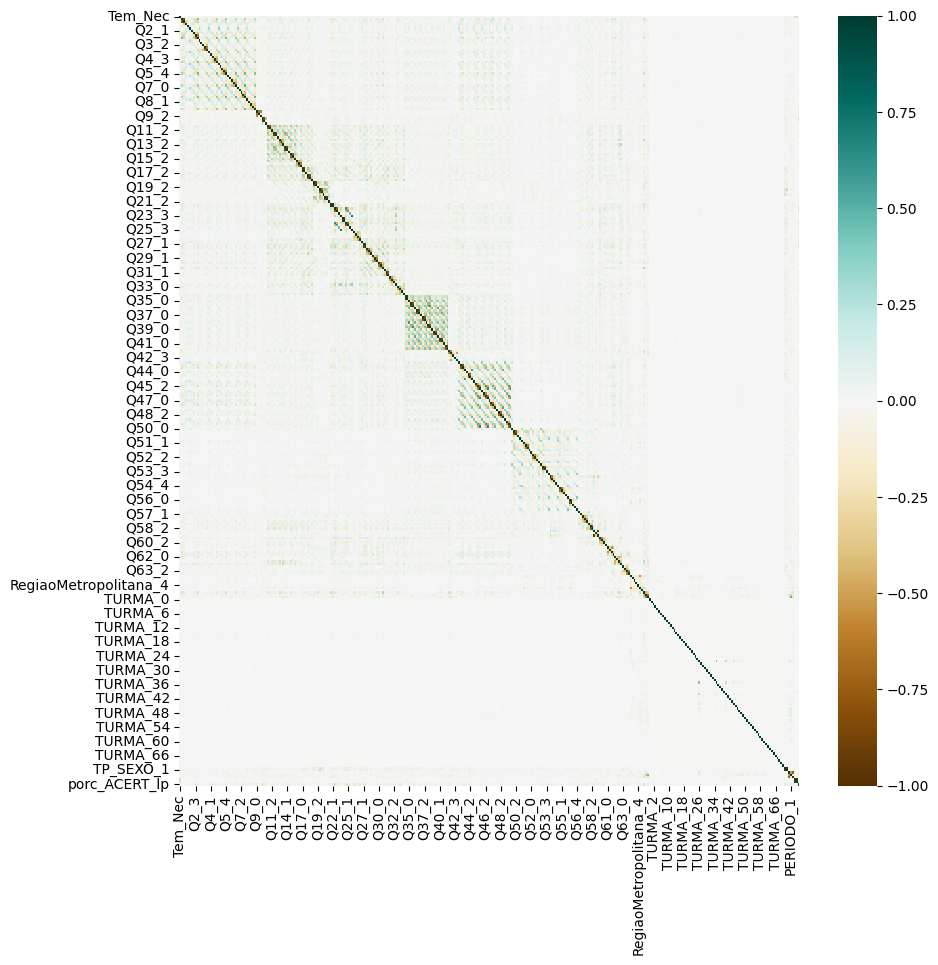

In [31]:
df_corr = df_x_corr.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, cmap='BrBG')

The data were trained and evaluated both by the regression model created by the duo and by the moedls avaiable in the ckit-learn library

In [ ]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.


class MyLinearRegression:
    def __init__(self, n_features):
        self.n_thetas = n_features + 1
        self.theta_0 = np.random.uniform(low=-1, high=1, size=1)
        self.thetas = np.asmatrix(np.random.uniform(low=-1, high=1, size=n_features)).T

        self.train_cost = []
        self.valid_cost = []
        
        
    def h_theta(self, x):
        return self.theta_0 + x*self.thetas
    
    
    def gradient(self, X, y):
        X = np.asmatrix(X.values)
        y = np.asmatrix(y)
        m = len(y)
        ht = self.h_theta(X)
        grad_theta_0 = 1/m * (ht - y).sum()
        grad_thetas = np.zeros(len(self.thetas)) 
        for i in range(len(grad_thetas)):
            grad_thetas[i] = 1/m * (ht - y).T*X[:,i]
        return grad_theta_0, grad_thetas


    def theta_update(self, grad_theta_0, grad_thetas, learning_rate):
        self.theta_0 = self.theta_0 - learning_rate*grad_theta_0
        self.thetas = self.thetas - learning_rate*(np.asmatrix(grad_thetas).T)


    def cost(self, X, y):
        X = np.asmatrix(np.array(X))
        y = np.asmatrix(np.array(y))
        m = len(y) 
        ht = self.h_theta(X)
        error = (np.array(ht) - np.array(y)).squeeze(1)
        return (error ** 2).sum() / m


    def fit(self, X, y, learning_rate, n_epochs, size_batches, validX, validy, verbose=False):
        for epoch in range(n_epochs + 1):
            n_batches = int( len(X) / size_batches )
            for en, (batchX, batchy) in enumerate( zip(np.array_split(X, n_batches), np.array_split(y, n_batches)) ):                
                grad_theta_0, grad_thetas = self.gradient(batchX, batchy)
                self.theta_update(grad_theta_0, grad_thetas, learning_rate=learning_rate)                  
            
            train_epoch_mse = self.cost(X, y)
            val_epoch_mse = self.cost(validX, validy)
            if verbose and (epoch%10 == 0):
                print('Epoch: {:04d} | Num. batches: {} | train MSE: {} | val MSE: {}'.format(epoch, n_batches, train_epoch_mse, val_epoch_mse))
                
            self.train_cost.append(train_epoch_mse)
            self.valid_cost.append(val_epoch_mse)    


In [ ]:
# Portuguese
start = time.time()
mlr = MyLinearRegression(n_features=X_lp.shape[1])
mlr.fit(x_train_lp, y_train_lp, learning_rate=0.001, n_epochs=100, size_batches=10240, validX=x_val_lp, validy=y_val_lp, verbose=True)
end = time.time()

ax = sns.lineplot(pd.DataFrame.from_dict( {'training' : mlr.train_cost, 'validation' : mlr.valid_cost} ))
ax.set_title('Cost Evolution for Portuguese Target')
ax.set_xlabel('Epochs')
plt.show()

In [ ]:
# Math
mlr = MyLinearRegression(n_features=X_lp.shape[1])
mlr.fit(x_train_math, y_train_math, learning_rate=0.001, n_epochs=100, size_batches=10240, validX=x_val_math, validy=y_val_math, verbose=True)

ax = sns.lineplot(pd.DataFrame.from_dict( {'training' : mlr.train_cost, 'validation' : mlr.valid_cost} ))
ax.set_title('Cost Evolution for Math Target')
ax.set_xlabel('Epochs')
plt.show()

In [ ]:
# Science
mlr = MyLinearRegression(n_features=X_lp.shape[1])
mlr.fit(x_train_cie, y_train_cie, learning_rate=0.001, n_epochs=100, size_batches=10240, validX=x_val_cie, validy=y_val_cie, verbose=True)

ax = sns.lineplot(pd.DataFrame.from_dict( {'training' : mlr.train_cost, 'validation' : mlr.valid_cost} ))
ax.set_title('Cost Evolution for Science Target')
ax.set_xlabel('Epochs')
plt.show()

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.

In [ ]:
def model_train_and_evaluation(x_train, y_train, x_val, y_val, learning_rate):
    '''
    Fits a model based on x_train and y_train
    Args:
        x_train: X trainning data
        y_train: target values of the trainning data
        learning_rate: learning rate
        x_val: X validation data
        y_val: target values of the validation data
    Returns:
        model: fitted model object      
    '''
    
    #Creating an object of the model
    model = SGDRegressor(max_iter=2000,random_state=SEED, learning_rate='invscaling', eta0=learning_rate)
    #Fitting the model with the trainning data
    model.fit(x_train, y_train)
    
    print(f'Model intercept value : {model.intercept_}')
#     print(f' Coeficients : {model.coef_}')
    
    y_pred = model.predict(x_val)
    
    print('\n')
    
    print(f"Mean Squared error: {mean_squared_error(y_val, y_pred)}")
    print(f"R2 Score: {r2_score(y_val, y_pred)}")
    return model

In [ ]:
#Portuguese
start = time.time()
model_lp = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.001)
end= time.time()

print(end-start)

In [ ]:
# Math
model_math = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.001)

In [ ]:
#Sciences
model_cie = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.001)


> What are the conclusions? (1-2 paragraphs)

With the comparison of the linear regression model implemend by scratch and the SGD regressor model from sklear library it was possible to observe that the metrics of the both methodologies are in the same scale. In the case of the Portuguese percentege of hit, the implementation by scratch have mean squared error of 395.90, 
while the model from sklearn have the metric of 293.62. This behavior was repeated hor the other analyzed subjects. It was also possible to notice that the processing time of the implementation by scratch (52s) was longer than the library version (4s), so it took 10 x more processing time.


2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [ ]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.

### Normal:

In [ ]:
def model_normal_solution(x_train, y_train, x_val, y_val):    
    '''
    Get the coefficientes of the normal linear regression equation
    Args:
        x_train: X trainning data
        y_train: target values of the trainning data
        x_val: X validation data
        y_val: target values of the validation data
    '''
       
    x_train_mat = np.asmatrix(x_train)
    y_train_mat = np.asmatrix(y_train)
    
    thetas = np.linalg.inv( x_train_mat.T * x_train_mat ) * ( x_train_mat.T * y_train_mat ) 
    
    x_val_arr = np.array(x_val)
    y_val_arr = np.array(y_val)
    
    
    x_val_mat = np.asmatrix(x_val)
    y_val_mat = np.asmatrix(y_val)
    
    y_pred = x_val_mat * thetas
    
    print('\n')
    
    print(f"Mean squared error: {mean_squared_error(y_val_mat, y_pred)}")
    print(f"R2 Score: {r2_score(y_val_mat, y_pred)}")


Portuguese:

In [ ]:
model_normal_lp = model_normal_solution(x_train_lp, y_train_lp,x_val_lp, y_val_lp)

Math

In [ ]:
model_normal_math = model_normal_solution(x_train_math, y_train_math,x_val_math, y_val_math)

Ciences:

In [ ]:
model_normal_cie = model_normal_solution(x_train_cie, y_train_cie,x_val_cie, y_val_cie)

From the results of the normal equatations one can see that theses equations, in the wat it was implemented, was no able to cope with the fitting process of the thetas. Both, the Mean Squared Error and the R2 Score, were the worst obtained until now. Maybe the source of the bbad fitting problem comes from the inversion expliit computed in the normal equation. If the inved matrix is not well conditionad the final result of the operation can be degenerated.


#### Evaluating Learning Rates:

#### Portuguese:

In [ ]:
model_lp_0_0001 = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.0001)

In [ ]:
model_lp_0_1 = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.1)

In [ ]:
model_lp_0_005 = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.005)

#### Math

In [ ]:
model_math_0_0001 = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.0001)

In [ ]:
model_math_0_1 = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.1)

In [ ]:
model_math_0_005 = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.005)

#### Sciences:

In [ ]:
model_cie_0_0001 = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.0001)

In [ ]:
model_cie_0_1 = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.1) 

In [ ]:
model_cie_0_0005 = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.0005)

With the analysis was possible to see the role of the learning rate in the modeling step. In all the cases, with lar tge learning_rate values (0.1), the model result was worst, but when the values were smaller, the model had its results improved. When model methodologies are compared (linear x polynomial logistic regression) it is possible to note that the data modeling and pre-processing may vary due to the particularities of the model. 

In the case of the polynomial regression, some features had to be removed from the analysis because of hardware memory issues. When the linear regression model was evaluated without the features that were removed in polynomial regression model, there was a worsening in the performance of the linear regression model. It is also relevant to point out the importance of the role of exploratory data analysis to understand which features could be removed in the polynomial features selection.


3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [ ]:
# # TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures

columns = x_train_lp.columns
filter = ['Q1', 'Q9', 'Q10', 'Q12', 'Q14', 'Q18','Q22', 'Q23', 'Q24', 'Q25', 'Q33', 'Q57', 'Regiao', 'DE', 'Serie']
selection = []
for col in columns:
    for fil in filter:
        if fil in col:
            selection.append(col)
#

In [ ]:
# Portuguese
x_train_lp_slim, x_val_lp_slim, y_train_lp_slim, y_val_lp_slim = x_train_lp[selection], x_val_lp[selection], y_train_lp, y_val_lp

# Math
x_train_math_slim, x_val_math_slim, y_train_math_slim, y_val_math_slim = x_train_math[selection], x_val_math[selection], y_train_math, y_val_math 

# Science
x_train_cie_slim, x_val_cie_slim, y_train_cie_slim, y_val_cie_slim = x_train_cie[selection], x_val_cie[selection], y_train_cie, y_val_cie


Portuguese:

In [ ]:
model_lp_slim_poly = model_train_and_evaluation(PolynomialFeatures(2).fit_transform(x_train_lp_slim), y_train_lp_slim, PolynomialFeatures(2).fit_transform(x_val_lp_slim), y_val_lp_slim, 0.001)


Math

In [ ]:
model_math_slim_poly = model_train_and_evaluation(PolynomialFeatures(2).fit_transform(x_train_math_slim), y_train_math_slim, PolynomialFeatures(2).fit_transform(x_val_math_slim), y_val_math_slim, 0.001)

Sciences

In [ ]:
model_cie_slim_poly = model_train_and_evaluation(PolynomialFeatures(2).fit_transform(x_train_cie_slim), y_train_cie_slim, PolynomialFeatures(2).fit_transform(x_val_cie_slim), y_val_cie_slim, 0.001)

*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

Because of the number of features that is more than 300, it was necessary to perform a selection of a subset of features in order to computational enable the application of the PolynomialFeatures strategy. The most important features considered  was listed  were their importance was assigned with the analysis of the questions and thier correlation the the target variables. Even though we are working a subset of features from the dataset, after applying the PolynomialFeature this number easy can increase at an amount that
regular computers are not able to cope with the amounts of memory necessary. Because of that, we decided to use just polynomial features of second order, that is, all the features are, at most, combined in a second order fashion way. Comparing the results of the previous models with the polynomial approach, it is possible to note that the SDG models performed better. One possible explanation is that some relevant features were removed from the analysis
 


4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

The plot are avaiable in the cells above, it was plot in the trainning step. It is possible to note that both in the trainning and validation steps, the metric (Mean Squared Error) is decreasing. The presence of overfitting in not noticed, however it is observed that the model is not being able to learn the patterns present in the problem. This is an indication that a more complex model is needed for this task.

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

Realizing model inference:


In [ ]:
data_path = "assets/SARESP_test.csv"
df_test=pd.read_csv(data_path)

In [ ]:
#dropping common columns for both problems (lienar and logistic regression)

df_test = df_test.drop(columns=['CD_ALUNO', 'CODESC', 'CODMUN', 'DT_NASCIMENTO', 'NOMESC','MUN','DE',
                      'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 'NEC_ESP_5'])


df_test = df_test.replace({'Básico':0, 'Adequado':1,'Abaixo do Básico':2,'Avançado':3})

#dropping columns for linear regression method
df_test_linear = df_test.drop(columns=['nivel_profic_mat','nivel_profic_cie'])

In [ ]:
X_lp_test, y_lp_test, X_math_test, y_math_test, X_cie_test, y_cie_test,_ = data_transform(df_test_linear,['porc_ACERT_MAT', 'porc_ACERT_lp','porc_ACERT_CIE'],le)

In [ ]:
def model_inference(model, x_test, y_test):
    '''
    Realizes the model inference in the test data
    Args:
        x_test: X testing set data
        y_test: target values of the testing data
        model: fitted model from the trainning step
    '''
    y_pred = model.predict(x_test)
    print(f"Mean Absolut error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")


In [ ]:
#Math Inference:
y_pred_math_test = model_inference(model_math, X_math_test, y_math_test)


In [ ]:
#Math Inference:
y_pred_lp_test = model_inference(model_lp, X_lp_test, y_lp_test)

In [ ]:
#Math Inference:
y_pred_cie_test = model_inference(model_cie, X_cie_test, y_cie_test)

With the obtained results it is possible to note that the models have different metrics when the test were performed. These metrics were lower than the ones obtained in the validation set (R2 Score).

Portuguese: (Validation: 0.3479 , Test: 0.3310)

Math: (Validation: 0.2909 , Test: 0.2753)

Sciences: (Validation: 0.2814% , Test: 0.3005)

## Logistic Regression

Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

In [ ]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.

In order to perform Logistic regression, a new dataframe was created with the relevant variables to the modeling. Then, this dataframe was been submited to the categorical to numerical transform pipeline

In [ ]:
df_logistic = df.drop(columns=['porc_ACERT_lp','porc_ACERT_MAT', 'porc_ACERT_CIE'])

In [ ]:
X_lp_log, y_lp_log, X_math_log, y_math_log, X_cie_log, y_cie_log,le_ = data_transform_cat_inference(df_logistic,['nivel_profic_lp', 'nivel_profic_mat','nivel_profic_cie'])

In [ ]:
#Portuguese:
x_train_lp_log, x_val_lp_log, y_train_lp_log, y_val_lp_log = train_test_split(X_lp_log, y_lp_log, test_size=0.20, random_state=SEED)

#Math
x_train_math_log, x_val_math_log, y_train_math_log, y_val_math_log = train_test_split(X_math_log, y_math_log, test_size=0.20, random_state=SEED)

#Sciences:
x_train_cie_log, x_val_cie_log, y_train_cie_log, y_val_cie_log = train_test_split(X_cie_log, y_cie_log, test_size=0.20, random_state=SEED)

In [ ]:
def model_train_and_evaluation_logistic(x_train, y_train, x_val, y_val, ticklabels=['Básico','Adequado','Abaixo do Básico','Avançado']):
    '''
    Train ad evaluate a logistic regression model
    Args:
        x_train: X trainning data
        y_train: target values of the trainning data
        x_val: X validation data
        y_val: target values of the validation data
        ticklabels = categorical label to plot in confusion matrix
    '''
    model_logistic = LogisticRegression(random_state=SEED, penalty='l2',class_weight={0:1, 1:1, 2:1, 3:3})
    model_logistic.fit(x_train, y_train)
    
    y_pred = model_logistic.predict(x_val)
    y_pred_proba = model_logistic.predict_proba(x_val)
    
    confusion = confusion_matrix(y_val, y_pred, normalize='true')
    accuracy = balanced_accuracy_score(y_val, y_pred)
    roc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
    
        
    sns.heatmap(confusion, annot=True, linewidths=.5,cmap="mako",
                xticklabels=ticklabels, yticklabels=ticklabels)
    
    print(f"Balanced Accuracy Score: {accuracy}")
    print(f'AUC Score: {roc}')
    
    print('\n')
    
    return model_logistic
    
   

In [ ]:
model_logistic_pt = model_train_and_evaluation_logistic(x_train_lp_log, y_train_lp_log, x_val_lp_log, y_val_lp_log)

In [ ]:
model_logistic_math = model_train_and_evaluation_logistic(x_train_math_log, y_train_math_log, x_val_math_log, y_val_math_log)

In [ ]:
model_logistic_cie = model_train_and_evaluation_logistic(x_train_cie_log, y_train_cie_log, x_val_cie_log, y_val_cie_log)

> What are the conclusions? (1-2 paragraphs)

Evaluating the models performance in the difference subjects was possible to note that in the threee cases, the inference models had better performance in predicting the class 'Básico'. On the other hand, both models had worse performance in predicting the 'Avançado' class. When we reviewed the conclusions obtained in the exporatory data anaçysis, we observed that the "Basico' and 'Avançado' classes are the categories with the highest and lowest respectively representation in the trainning set. This representation in the training data corroborates with the model performance. 

It as also possible to note the importance of applying a balanced accuracy as opposed to conventional accuracy. With the balanced accuracy metric, it was possible to have and idea of the real performance of the model considering the particularities in the performance of the different classes present in the task.


2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (1-2 paragraphs)



3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

Inference:

In [ ]:
def model_inference_logistic(model, x_test, y_test, ticklabels=['Básico','Adequado','Abaixo do Básico','Avançado']):
    '''
    Realizes the model inference with a logistic regression model in the test data
    Args:
        x_test: X testing set data
        y_test: target values of the testing data
        model: fitted model from the trainning step
    Returns:
        y_pred: predicted labels
    '''
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)
    
    confusion = confusion_matrix(y_test, y_pred, normalize='true')
    accuracy = balanced_accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    sns.heatmap(confusion, annot=True, linewidths=.5,cmap="mako",
                xticklabels=ticklabels, yticklabels=ticklabels)
    
    print(f"Balanced Accuracy Score: {accuracy}")
    print(f'AUC Score: {roc}')
    
    return y_pred

In [ ]:
#dropping columns for linear regression method
df_test_logistic = df_test.drop(columns=['porc_ACERT_lp', 'porc_ACERT_MAT','porc_ACERT_CIE'])

In [ ]:
X_math_log_test, y_math_log_test, X_cie_log_test, y_cie_log_test,_ = data_transform_cat_inference(df_test_logistic,['nivel_profic_mat','nivel_profic_cie'],le)

In [ ]:
#Math Inference:
y_pred_math_test_logistic = model_inference_logistic(model_logistic_math, X_math_log_test, y_math_log_test)


In [ ]:
#Math Inference:
y_pred_cie_test_logistic = model_inference_logistic(model_logistic_cie, X_cie_log_test, y_cie_log_test)


Getting the data from Kaggle Plataform in order to make the inference with Portuguese data:

In [ ]:
df_kaggle = pd.read_csv('assets/SARESP_test_kaggle.csv')

In [ ]:
df_kaggle_test = df_kaggle.drop(columns=['CD_ALUNO', 'CODESC', 'CODMUN', 'DT_NASCIMENTO', 'NOMESC','MUN','DE',
                      'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 'NEC_ESP_5'])


In [ ]:
numeric_kaggle_test, le = categorical_into_numeric(df_kaggle_test, le)

In [ ]:
numeric_kaggle_test

In [ ]:
y_pred_kaggle_test = model_logistic_pt.predict(numeric_kaggle_test)
#convert to list
cd_aluno = df_kaggle['CD_ALUNO'].tolist()

#convert to list
y_pred_list = y_pred_kaggle_test.tolist()

#Creating a new dataframe
df_kaggle = pd.DataFrame(list(zip(cd_aluno,y_pred_list)), columns=['CD_ALUNO', 'PL_proficiency'])

In [ ]:
df_kaggle.to_csv('lp_test.csv', index=False)

> What are the conclusions? (1-2 paragraphs)

With the obtained results it is possible to note that the models have different metrics when the test were performed. These metrics were lower than the ones obtained in the validation set.
The following metrics were obtained in the validation and test sets considering AUC Score

Portuguese: (Validation: 76.39% , Test: 59.99% - Kaggle Leaderboard)\

Math: (Validation: 79.37% , Test: 77.00%)

Sciences: (Validation: 75,77% , Test: 75.75&)

An important observation found in the elaboration of the solution was that when different weight was placed on the classes (class 3 with weight * 2), the model performed better.

## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**